In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import find_peaks_cwt
from scipy.signal import peak_prominences
from scipy.signal import savgol_filter
from scipy.signal import peak_widths
from scipy.signal import argrelmax, argrelmin

In [9]:
df = pd.read_csv("analog-data.csv", header=None, index_col=0)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,,,,,,,,,,,,,,,,,,,,,
sample_1,1062,1059,1065,1061,1064,1060,1057,1059,1060,1058,...,1090,1085,1089,1087,1085,1086,1088,1084,1082,1083
sample_2,1085,1081,1081,1079,1080,1079,1079,1078,1074,1076,...,1096,1097,1096,1099,1099,1096,1097,1099,1098,1095
sample_3,1092,1087,1086,1088,1084,1085,1091,1085,1085,1083,...,1105,1100,1102,1103,1105,1100,1104,1101,1101,1104
sample_4,1101,1105,1111,1106,1105,1106,1105,1101,1103,1104,...,1103,1102,1104,1101,1099,1101,1102,1104,1097,1099
sample_5,1101,1094,1092,1091,1093,1093,1090,1092,1093,1088,...,1090,1095,1097,1094,1093,1097,1095,1097,1096,1095


# Example plot output

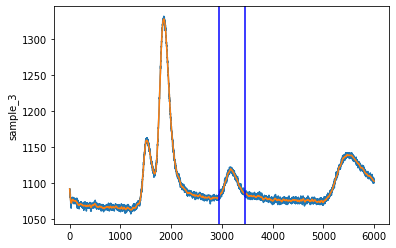

In [226]:
n=2
y_raw = df.iloc[n]
y = savgol_filter(y_raw, 51, 2) # window size 51, polynomial order 3
x = range(len(x))
maxi = argrelmax(y, order=200)[0]
maxi_val = [y[n] for n in maxi]
solvent_peak = maxi[maxi_val.index(max(maxi_val))]

# The solvent peak is approximately this distance from the etyhlene peak
start, end = solvent_peak+1100 ,solvent_peak+1600
trapz.append(np.trapz(y[start:end]-y[start]))

# Draw and save the plot
ax = sns.lineplot(y=y_raw, x=x)
ax = sns.lineplot(y=y, x=x)
plt.axvline(start, color='blue')
plt.axvline(end, color='blue')
plt.show()
plt.close()

# Automated script

In [227]:
trapz = []
for n in range(len(df)):
    y_raw = df.iloc[n]
    y = savgol_filter(y_raw, 51, 2) # window size 51, polynomial order 3
    x = range(len(x))
    maxi = argrelmax(y, order=200)[0]
    maxi_val = [y[n] for n in maxi]
    solvent_peak = maxi[maxi_val.index(max(maxi_val))]
    
    # The solvent peak is approximately this distance from the etyhlene peak
    start, end = solvent_peak+1100 ,solvent_peak+1600
    trapz.append(np.trapz(y[start:end]-y[start]))
    
    # Draw and save the plot
    ax = sns.lineplot(y=y_raw, x=x)
    ax = sns.lineplot(y=y, x=x)
    plt.axvline(start, color='blue')
    plt.axvline(end, color='blue')
    plt.savefig("plots/"+str(n)+".png") 
    plt.close()

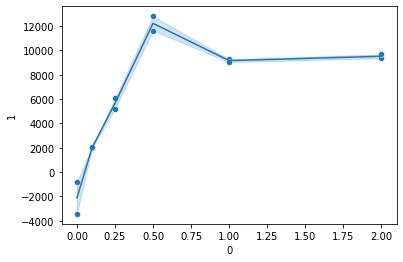

In [229]:
# Draw the plot for the internal standard
standard = [0,2,2,1,1,0.5,0.5,0.25,0.25,0.1,0.1,0]
res = pd.DataFrame([standard, trapz]).T
sns.lineplot(x=0, y=1, data=res)
sns.scatterplot(x=0, y=1, data=res)

# Troubleshooting 

In [ ]:
# For improved accuracy the baseline needs to be corrected due to downward slope
# Maybe this could be useful: https://github.com/derb12/pybaselines

<ipython-input-220-289053f6f46f>:6: PeakPropertyWarning: some peaks have a prominence of 0
  prominences = peak_prominences(y, peaks)


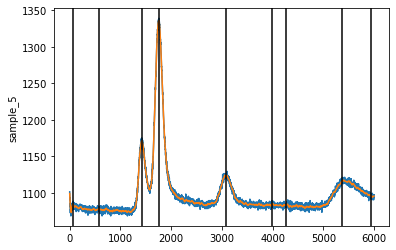

In [220]:
# Scipy can find the major peaks but fails at correctly identifying the left and right peak borders
n = 4
y_raw = df.iloc[n]
y = savgol_filter(y_raw, 51, 2) # window size 51, polynomial order 3
x = range(len(x))
peaks = find_peaks_cwt(y, widths=[60])
prominences = peak_prominences(y, peaks)
out_df = pd.DataFrame([peaks, prominences[0], prominences[1], prominences[2]]).T
out_df.columns = ["peak_time", "prominences", "left", "right"]

ax = sns.lineplot(y=y_raw, x=x)
ax = sns.lineplot(y=y, x=x)
for n in range(len(peaks)):
    plt.axvline(peaks[n], color='black')